In [1]:
# Download dataset
#!wget https://deepchemdata.s3-us-west-1.amazonaws.com/datasets/delaney-processed.csv

In [2]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors

In [3]:
df = pd.read_csv('delaney-processed.csv')
df.head()

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1


In [4]:
df.describe()

,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre
count,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000
mean,-2.988192,1.058511,203.937074,0.701241,1.390957,2.177305,34.872881,-3.050102
std,1.683220,0.238560,102.738077,1.089727,1.318286,2.640974,35.383593,2.096441
min,-9.702000,0.000000,16.043000,0.000000,0.000000,0.000000,0.000000,-11.600000
25%,-3.948250,1.000000,121.183000,0.000000,0.000000,0.000000,0.000000,-4.317500
50%,-2.870000,1.000000,182.179000,0.000000,1.000000,1.000000,26.300000,-2.860000
75%,-1.843750,1.000000,270.372000,1.000000,2.000000,3.000000,55.440000,-1.600000
max,1.091000,2.000000,780.949000,11.000000,8.000000,23.000000,268.680000,1.580000


In [5]:
df.dtypes

Compound ID                                         object
ESOL predicted log solubility in mols per litre    float64
Minimum Degree                                       int64
Molecular Weight                                   float64
Number of H-Bond Donors                              int64
Number of Rings                                      int64
Number of Rotatable Bonds                            int64
Polar Surface Area                                 float64
measured log solubility in mols per litre          float64
smiles                                              object
dtype: object

In [6]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# --- Extract true and predicted values ---
y_true = df["measured log solubility in mols per litre"]
y_pred = df["ESOL predicted log solubility in mols per litre"]

# --- Compute regression metrics ---
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print(f"📈 Regression Evaluation Results:")
print(f"MAE  = {mae:.4f}")
print(f"RMSE = {rmse:.4f}")
print(f"R²   = {r2:.4f}")


📈 Regression Evaluation Results:
MAE  = 0.6979
RMSE = 0.9101
R²   = 0.8114


In [7]:
# --- Extract true and predicted values ---
y_true = df["measured log solubility in mols per litre"].to_numpy()
y_pred = df["ESOL predicted log solubility in mols per litre"].to_numpy()

# --- Compute metrics manually using NumPy ---
mae = np.mean(np.abs(y_true - y_pred))
rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
r2 = 1 - np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2)

# --- Print results ---
print("📈 Regression Evaluation Results:")
print(f"MAE  = {mae:.4f}")
print(f"RMSE = {rmse:.4f}")
print(f"R²   = {r2:.4f}")


📈 Regression Evaluation Results:
MAE  = 0.6979
RMSE = 0.9101
R²   = 0.8114


In [8]:
# --- Extract features (X) and target (y) ---
X = df[[
    "Molecular Weight",
    "Number of H-Bond Donors",
    "Number of Rings",
    "Number of Rotatable Bonds",
    "Polar Surface Area"
]].to_numpy()

y = df["measured log solubility in mols per litre"].to_numpy()
y_pred = df["ESOL predicted log solubility in mols per litre"].to_numpy()

# --- Set split ratio and random seed for reproducibility ---
test_ratio = 0.2
np.random.seed(42)

# --- Shuffle indices ---
indices = np.arange(len(X))
np.random.shuffle(indices)

# --- Compute split index ---
split_idx = int(len(X) * (1 - test_ratio))

# --- Split the dataset ---
train_idx = indices[:split_idx]
test_idx = indices[split_idx:]

X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

# --- Display results ---
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

# Check example values
print("\nExample:")
print("X_train[0]:", X_train[0])
print("y_train[0]:", y_train[0])

Training samples: 902
Testing samples: 226

Example:
X_train[0]: [70.135  0.     0.     1.     0.   ]
y_train[0]: -2.54


In [9]:
y_true = df["measured log solubility in mols per litre"].to_numpy()
y_pred = y_pred

# --- Compute metrics manually using NumPy ---
mae = np.mean(np.abs(y_true - y_pred))
rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
r2 = 1 - np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2)

# --- Print results ---
print("📈 Regression Evaluation Results:")
print(f"MAE  = {mae:.4f}")
print(f"RMSE = {rmse:.4f}")
print(f"R²   = {r2:.4f}")

📈 Regression Evaluation Results:
MAE  = 0.6979
RMSE = 0.9101
R²   = 0.8114


In [10]:
from sklearn.model_selection import train_test_split

# --- Define features (X) and target (y) ---
X = df[[
    "Molecular Weight",
    "Number of H-Bond Donors",
    "Number of Rings",
    "Number of Rotatable Bonds",
    "Polar Surface Area"
]]
y = df["measured log solubility in mols per litre"]

# --- Split into train and test sets ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Display info ---
print(f"Training samples: {len(X_train)}")
print(f"Testing samples:  {len(X_test)}")

Training samples: 902
Testing samples:  226


In [11]:
X_train.shape, y_train.shape

((902, 5), (902,))

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
# 4️⃣ Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
import torch

from torch import nn

In [15]:
# 5️⃣ Convert to PyTorch tensors
X_train_t = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_t = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_t = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_t = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

X_train_t.shape, y_train_t.shape, X_test_t.shape, y_test_t.shape

(torch.Size([902, 5]),
 torch.Size([902, 1]),
 torch.Size([226, 5]),
 torch.Size([226, 1]))

In [16]:
# 6️⃣ Define MLP model
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(5, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1)
        )

    def forward(self, x):
        return self.model(x)

model = MLP()
model

MLP(
  (model): Sequential(
    (0): Linear(in_features=5, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [17]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)

In [18]:
# 8️⃣ Training loop with manual loss computation
epochs = 5000
train_losses = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    y_pred = model(X_train_t)

    # --- Manual MSE loss ---
    loss = torch.mean((y_pred - y_train_t) ** 2)

    # Backpropagation
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    if (epoch + 1) % 50 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

Epoch 50/5000, Loss: 6.7459
Epoch 100/5000, Loss: 2.1276
Epoch 150/5000, Loss: 1.6366
Epoch 200/5000, Loss: 1.4384
Epoch 250/5000, Loss: 1.2734
Epoch 300/5000, Loss: 1.1201
Epoch 350/5000, Loss: 0.9981
Epoch 400/5000, Loss: 0.9107
Epoch 450/5000, Loss: 0.8521
Epoch 500/5000, Loss: 0.8081
Epoch 550/5000, Loss: 0.7690
Epoch 600/5000, Loss: 0.7366
Epoch 650/5000, Loss: 0.7117
Epoch 700/5000, Loss: 0.6915
Epoch 750/5000, Loss: 0.6733
Epoch 800/5000, Loss: 0.6566
Epoch 850/5000, Loss: 0.6424
Epoch 900/5000, Loss: 0.6296
Epoch 950/5000, Loss: 0.6184
Epoch 1000/5000, Loss: 0.6076
Epoch 1050/5000, Loss: 0.5972
Epoch 1100/5000, Loss: 0.5871
Epoch 1150/5000, Loss: 0.5782
Epoch 1200/5000, Loss: 0.5700
Epoch 1250/5000, Loss: 0.5617
Epoch 1300/5000, Loss: 0.5534
Epoch 1350/5000, Loss: 0.5443
Epoch 1400/5000, Loss: 0.5353
Epoch 1450/5000, Loss: 0.5280
Epoch 1500/5000, Loss: 0.5219
Epoch 1550/5000, Loss: 0.5157
Epoch 1600/5000, Loss: 0.5099
Epoch 1650/5000, Loss: 0.5042
Epoch 1700/5000, Loss: 0.4987


In [19]:
# 9️⃣ Evaluate on test set
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test_t)
    test_loss = torch.mean((y_pred_test - y_test_t) ** 2).item()

print(f"\n✅ Test MSE: {test_loss:.4f}")
print(f"Test RMSE: {np.sqrt(test_loss):.4f}")


✅ Test MSE: 0.9847
Test RMSE: 0.9923


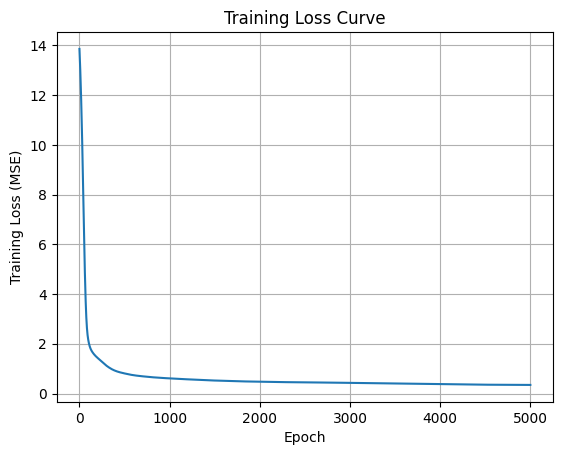

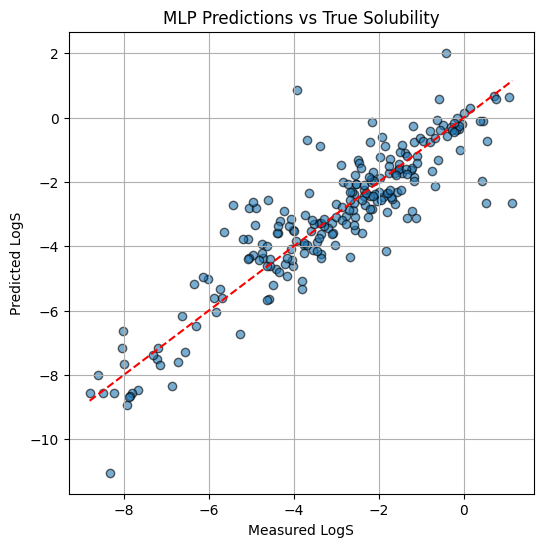

In [20]:
import matplotlib.pyplot as plt

# 🔟 Plot training loss
plt.plot(train_losses)
plt.xlabel("Epoch")
plt.ylabel("Training Loss (MSE)")
plt.title("Training Loss Curve")
plt.grid(True)
plt.show()

# 1️⃣1️⃣ Compare predicted vs true
y_pred_np = y_pred_test.numpy().flatten()
y_true_np = y_test_t.numpy().flatten()

plt.figure(figsize=(6,6))
plt.scatter(y_true_np, y_pred_np, alpha=0.6, edgecolor='k')
plt.plot([y_true_np.min(), y_true_np.max()], [y_true_np.min(), y_true_np.max()], 'r--')
plt.xlabel("Measured LogS")
plt.ylabel("Predicted LogS")
plt.title("MLP Predictions vs True Solubility")
plt.grid(True)
plt.show()
